In [1]:
import torch
import numpy as np
from torchvision import datasets
import matplotlib.pyplot as plt

In [2]:
# 加载数据
train = datasets.MNIST(root="./data/",
                       train=True,
                       download=True)
test = datasets.MNIST(root='./data/',
                      train=False,
                      download=True)
train_data = np.array(train.data).reshape(len(train), 784)
train_label = np.array(train.train_labels.data)
test_data = np.array(test.data).reshape(len(test), 784)
test_label = np.array(test.test_labels.data)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


/home/lantian/.conda/envs/torch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/lantian/.conda/envs/torch/lib/python3.8/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


#### 使用PCA进行可视化

(10000, 2)


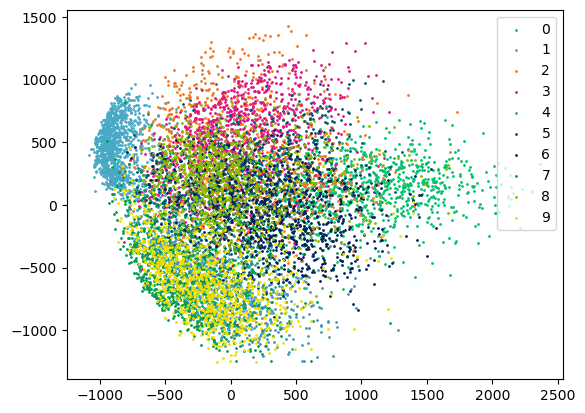

In [4]:
from sklearn.decomposition import PCA
color=['#00c16e','#48a9c5','#f47721','#da1884','#4298b5','#005670','#00205b','#009f4d','#84bd00','#efdf00']
reduced=PCA(n_components=2).fit_transform(test_data)
print(reduced.shape)

handles=[]
labels=[]
plt.figure('visualize')
for i in range(10):
    handle=plt.scatter(reduced[test_label==i,0],reduced[test_label==i,1],c=color[i],s=1)
    handles.append(handle)
    labels.append(str(i))
plt.legend(handles=handles,labels=labels)
plt.show('visualize')

#### 使用tSNE进行可视化

/home/lantian/.conda/envs/torch/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(10000, 2)


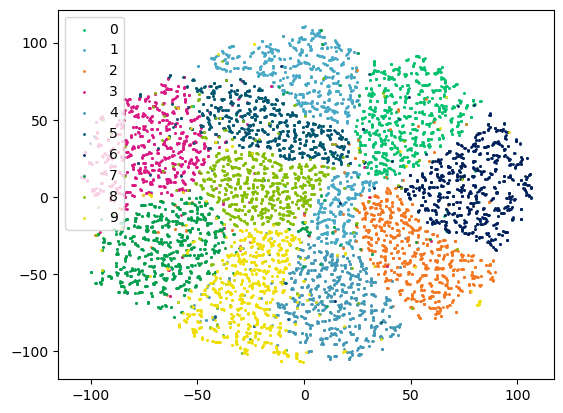

In [5]:
from sklearn.manifold import TSNE
color = ['#00c16e', '#48a9c5', '#f47721', '#da1884', '#4298b5',
         '#005670', '#00205b', '#009f4d', '#84bd00', '#efdf00']
reduced = TSNE(n_components=2,
               learning_rate='auto',
               perplexity=3).fit_transform(test_data)
print(reduced.shape)

handles = []
labels = []
plt.figure('visualize')
for i in range(10):
    handle = plt.scatter(reduced[test_label == i, 0],
                         reduced[test_label == i, 1], c=color[i], s=1)
    handles.append(handle)
    labels.append(str(i))
plt.legend(handles=handles, labels=labels)
plt.show('visualize')

#### 使用随机森林进行训练

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(criterion='entropy',
                              splitter='random',
                              max_depth=21,
                              min_samples_split=3,
                              random_state=0)
tree.fit(X=train_data, y=train_label)
pred = tree.predict(test_data)
print('tree accuracy : %.2f' % accuracy_score(pred, test_label))

forest = RandomForestClassifier(n_estimators=100,
                                criterion='entropy',
                                # max_depth=21,
                                # min_samples_split=3,
                                random_state=0)
forest.fit(X=train_data, y=train_label)
pred = forest.predict(test_data)
print('forest accuracy : %.2f' % accuracy_score(pred, test_label))

tree accuracy : 0.88
forest accuracy : 0.97
